IMPORING THE LIBRARIES

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [27]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

IMPLEMENTING UCB

In [28]:
import math 
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

In [29]:
for n in range(N):
    ad=0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt((3/2)*(math.log(n+1)/numbers_of_selections[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward += reward

VISUALISING THE RESULTS

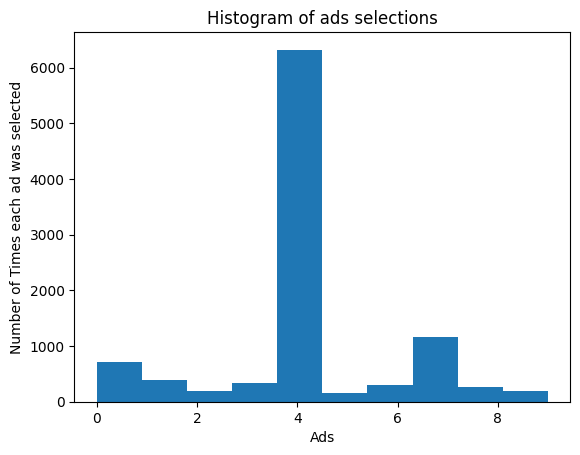

In [30]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel('Number of Times each ad was selected')
plt.show()